<a href="https://colab.research.google.com/github/NOORAHMED3676/Scaler_projects/blob/main/Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [56]:
df.shape

(8807, 12)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [58]:
df["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [59]:
df["country"].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Mexico, United States, Spain, Colombia",1
"Canada, Norway",1
"Finland, Germany, Belgium",1


In [60]:
df["release_year"].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


In [61]:
 # Number of titles added by year

 df["df_added"] = pd.to_datetime(df["date_added"], errors="coerce")
 df["year_added"] = df["df_added"].dt.year
 titles_by_year = df["year_added"].value_counts().sort_index()
 print("Number of Titles Added by Year:")
 print(titles_by_year)

Number of Titles Added by Year:
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


### 1) How has the number of movies released per year changed over the last 20-30 years?

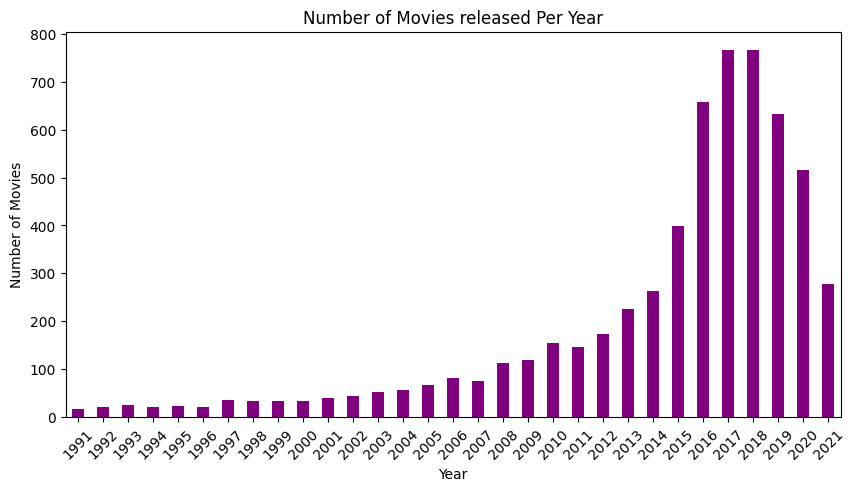

In [62]:
 movies_df = df[df["type"]=="Movie"]
 movies_last_30_years = movies_df[movies_df["release_year"]>1990]
 movies_per_year = movies_last_30_years["release_year"].value_counts().sort_index()
 plt.figure(figsize=(10,5))
 movies_per_year.plot(kind="bar",color="Purple")
 plt.title("Number of Movies released Per Year")
 plt.xlabel("Year")
 plt.ylabel("Number of Movies")
 plt.xticks(rotation=45)
 plt.show()

## 2) Comparison of Tv Shows Vs Movies

In [63]:
 type_counts = df["type"].value_counts()
 print("Number of Movies Vs Tv Shows :")
 print(type_counts)

Number of Movies Vs Tv Shows :
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


##3) What is the best time to launch a TV show

In [64]:
tv_shows_df = df [df['type']=='TV Show']
tv_shows_df['date_added'] = pd.to_datetime(tv_shows_df['date_added'],errors='coerce')
tv_shows_df['month_added'] = tv_shows_df ['date_added'].dt.month
tv_shows_df['year_added'] = tv_shows_df['date_added'].dt.year
tv_shows_by_month_total = tv_shows_df ['month_added'].value_counts().sort_index()
tv_shows_by_average_total = tv_shows_df.groupby('month_added').size().mean()
print('Total number of TV shows added per month')
print(tv_shows_by_month_total)
print('\nAverage number of TV shows added per month:')
print(tv_shows_by_average_total)

Total number of TV shows added per month
month_added
1.0     181
2.0     175
3.0     205
4.0     209
5.0     187
6.0     232
7.0     254
8.0     230
9.0     246
10.0    210
11.0    199
12.0    250
Name: count, dtype: int64

Average number of TV shows added per month:
214.83333333333334


<ipython-input-64-88f2beb9b17e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['date_added'] = pd.to_datetime(tv_shows_df['date_added'],errors='coerce')
<ipython-input-64-88f2beb9b17e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['month_added'] = tv_shows_df ['date_added'].dt.month
<ipython-input-64-88f2beb9b17e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

##4)Analysis of actors/directors of different types of shows/movies

In [65]:
 tv_shows_with_dir = tv_shows_df.dropna(subset='director')
 movies_shows_with_dir = movies_df.dropna(subset='director')
 top_movie_directors = movies_shows_with_dir['director'].value_counts().head(10)
 print('Top 10 Directors for Movies:')
 print(top_movie_directors)
 top_tv_shows_directors = tv_shows_with_dir['director'].value_counts().head(10)
 print('\nTop 10 Directors for TV Shows:')
 print(top_tv_shows_directors)

Top 10 Directors for Movies:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64

Top 10 Directors for TV Shows:
director
Alastair Fothergill                    3
Rob Seidenglanz                        2
Ken Burns                              2
Stan Lathan                            2
Shin Won-ho                            2
Hsu Fu-chun                            2
Iginio Straffi                         2
Jason Hehir                            1
Gerhard Mostert                        1
Luis Alfaro, Javier Gómez Santander    1
Name: count, dtype: int64


##5)Does Net ix has more focus on TV Shows than movies in recent years

In [66]:
 recent_years = 5
 recent_df= df[df['year_added']>=df['year_added'].max() - recent_years]
 tv_shows_vs_movies = recent_df.groupby(['year_added','type']).size().unstack()
 tv_shows_vs_movies = tv_shows_vs_movies.fillna(0)
 print(tv_shows_vs_movies)
 total_tv_shows = tv_shows_vs_movies['TV Show'].sum()
 total_movies = tv_shows_vs_movies['Movie'].sum()
 print("\nTotal Movies added in the last recent_years) years: (total_movies)")
 print("Total TV Shows added in the last recent_years) years: (total_tv_shows)")
 if total_tv_shows > total_movies:
  print("\nNetflix has focused more on TV Shows than Movies in the last {recent_years}")
 else:
  print("\nNetflix has focused more on Movies than TV Shows in the last {recent_years}")

type        Movie  TV Show
year_added                
2016.0        253      165
2017.0        839      325
2018.0       1237      388
2019.0       1424      575
2020.0       1284      594
2021.0        993      505

Total Movies added in the last recent_years) years: (total_movies)
Total TV Shows added in the last recent_years) years: (total_tv_shows)

Netflix has focused more on Movies than TV Shows in the last {recent_years}


In [67]:
 tv_shows_vs_movies

type,Movie,TV Show
year_added,,
2016.0,253,165
2017.0,839,325
2018.0,1237,388
2019.0,1424,575
2020.0,1284,594
2021.0,993,505


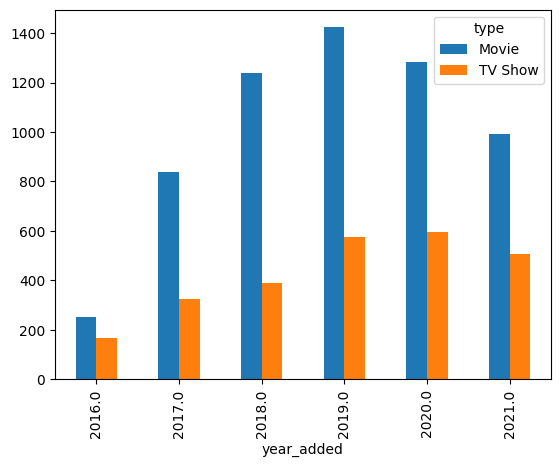

In [68]:
tv_shows_vs_movies.plot(kind='bar')
plt.show()

##6) Understanding what content is available in different countries

In [69]:
 df_clean= df. dropna (subset='country')
 df_clean['country'] = df['country'].str.split(', ')
 df_exploded=df_clean.explode('country')
 content_by_country= df_exploded['country'].value_counts()
 print('Top 10 Content available by country:')
 print(content_by_country.head(10))

Top 10 Content available by country:
country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


<ipython-input-69-7887bae189fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['country'] = df['country'].str.split(', ')


##Understanding What Content is Available in Different Countries

In [70]:
 df_clean =df. dropna (subset='country')
 df_clean['country'] = df['country'].str.split(', ')
 df_exploded=df_clean.explode('country')
 content_by_country= df_exploded['country'].value_counts()
 print('Top 10 Content available by country:')
 print(content_by_country.head(15))

Top 10 Content available by country:
country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Name: count, dtype: int64


<ipython-input-70-11cbf9ec6f83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['country'] = df['country'].str.split(', ')


## Analyzing Content Type (Movies vs. TV Shows) by Country

In [71]:
 content_type_by_country= df_exploded.groupby(['country', 'type']).size().unstack(fill_value=0)
 print("\nTop 10 Distribution of content types (Movies vs TV Shows) by country:")
 print(content_type_by_country.head(10))


Top 10 Distribution of content types (Movies vs TV Shows) by country:
type         Movie  TV Show
country                    
                 1        1
Afghanistan      1        0
Albania          1        0
Algeria          3        0
Angola           1        0
Argentina       71       20
Armenia          1        0
Australia       94       66
Austria         11        1
Azerbaijan       0        1


In [72]:
 # Genre Distribution by Country
 df_exploded['listed_in'] = df_exploded['listed_in'].astype(str)
 df_genre_exploded = df_exploded.explode('listed_in')
 genres_by_country= df_genre_exploded.groupby(['country', 'listed_in']).size().unstack(fill_value=0)
 print("\nTop 10 Genre distribution by country (Top 10):")
 print(genres_by_country.head(15))


Top 10 Genre distribution by country (Top 10):
listed_in    Action & Adventure  \
country                           
                              0   
Afghanistan                   0   
Albania                       0   
Algeria                       0   
Angola                        0   
Argentina                     0   
Armenia                       0   
Australia                     1   
Austria                       0   
Azerbaijan                    0   
Bahamas                       1   
Bangladesh                    0   
Belarus                       0   
Belgium                       1   
Bermuda                       0   

listed_in    Action & Adventure, Anime Features, Children & Family Movies  \
country                                                                     
                                                             0              
Afghanistan                                                  0              
Albania                                         

## Top Content in Each Country

In [73]:
 top_content_by_country = df_exploded.groupby(["country","title"]).size().sort_values(ascending=False)
 print("\nTop Content in Each Country:")
 print(top_content_by_country)


Top Content in Each Country:
country      title                           
Zimbabwe     Trophy                              1
             D.P.                                1
             Eyes of a Thief                     1
Afghanistan  The Land of the Enlightened         1
Albania      Forgive Us Our Debts                1
                                                ..
Argentina    Black Snow                          1
             Apache: The Life of Carlos Tevez    1
             Almost Happy                        1
             Alelí                               1
             Al acecho                           1
Length: 10014, dtype: int64


## Defining Problem Statement and Analysing basic metric

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   object        
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  df_added      8709 non-null   datetime64[ns]
 13  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 963.4+ KB


##Non - Graphical Analysis : Value Counts and Unique Attribute

In [75]:
 genres = df["listed_in"].str.split(",").explode()
 genre_count = genres.value_counts()
 print("\nTop 20 Most Common Genres")
 print(genre_count.head(15))


Top 20 Most Common Genres
listed_in
 International Movies       2624
Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
 Dramas                      827
International TV Shows       774
 Independent Movies          736
 TV Dramas                   696
 Romantic Movies             613
Children & Family Movies     605
 International TV Shows      577
 Thrillers                   512
 Comedies                    464
 TV Comedies                 461
Name: count, dtype: int64


##Histplot (Distribution of Release Year)

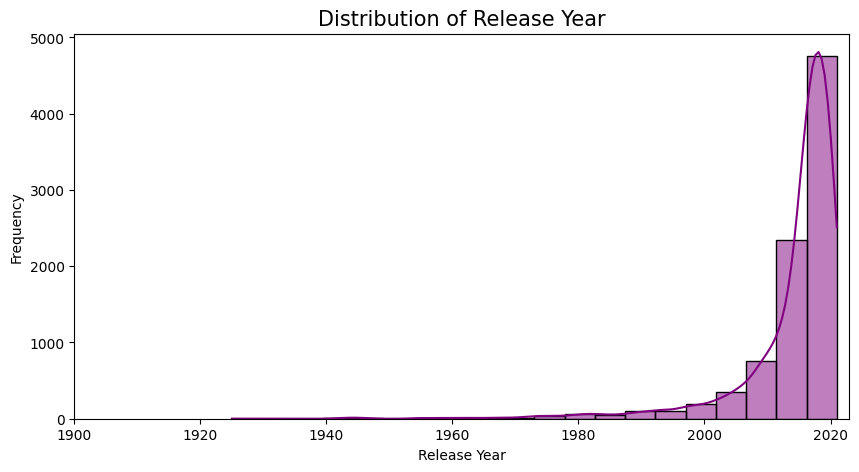

In [76]:
 plt.figure(figsize=(10,5),)
 sns.histplot(df["release_year"],kde=True,bins=20,color="purple")
 plt.title("Distribution of Release Year",fontsize=15)
 plt.xlabel("Release Year")
 plt.xlim(1900,2023)
 plt.ylabel("Frequency")
 plt.show()

##Countplot (Number of Movies Vs Tv Shows)

Text(0, 0.5, 'Count of Tv shows & Movies')

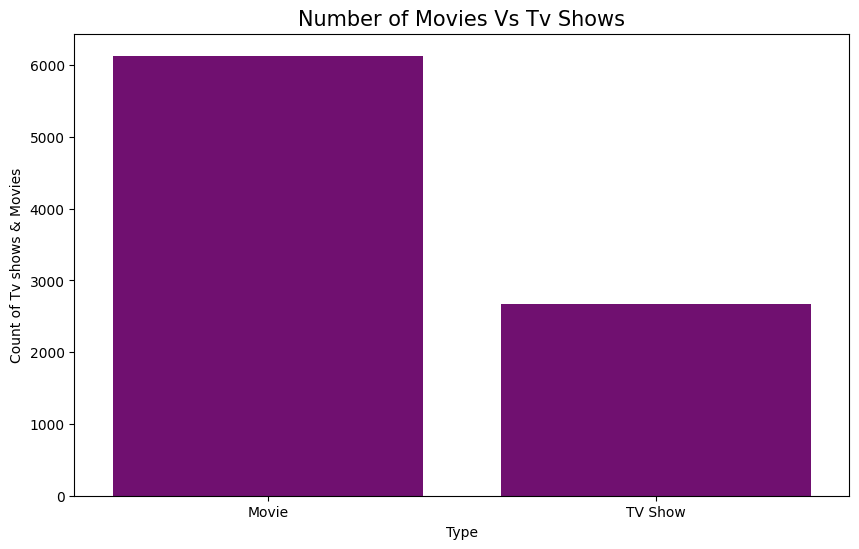

In [77]:
 plt.figure(figsize=(10,6))
 sns.countplot(x='type',data=df,color ="Purple")
 plt.title('Number of Movies Vs Tv Shows',fontsize=15)
 plt.xlabel('Type')
 plt.ylabel('Count of Tv shows & Movies')

 ### Business Insights

 1. Release Year Trends and Content Focus The goal of Net ix's strategy is to appeal to modern viewers by offering more relevant and recent
 material. The increase in TV series is indicative of the platform's move toward serialized content, which keeps users engaged over time
 and helps retain subscriptions.
 2. Genre Preferences and Market Strategy While international movies are more popular in specialized markets, Net ix's content mix of
 dramas and foreign lms appeals to a wide range of viewers worldwide. Net ix is able to effectively target both local and worldwide
 markets.
 3. Country-Level Content Strategy Net ix is leveraging strong content production hubs like the USA and India to dominate global streaming
 markets.
 4. Release Time Strategy When there is a spike in viewership, such as around the holidays or during school breaks, Net ix carefully adds
 fresh content. This is consistent with the habits of subscribers who are more likely to binge-watch during vacations or long weekends.
 5. Opportunities in Content Ratings and Audience Engagement Net ix's engagement strategy for adult customers is re ected in its
 concentration on mature audiences in TV series. A more wellrounded content strategy, though, might boost family involvement

### Recommendations

 1. Expand Focus on TV Shows Net ix should keep creating more original series since there is a rising market for television programming.